In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from data_gen import Args, data_gen_decision_tree, visualize
import numpy as np
# from dlgn import trainDLGN
# from lcn import trainLCN
# from latent import trainLatentTree
# from tao import trainTAO
import dlgn
import lcn
import latent
import tao
import kernel

4_50_3_1.0e-03
cpu


In [3]:
algorithms = [tao.trainTAO]
# algorithms = []
# algorithms = [kernel.trainSVM, tao.trainTAO]

In [4]:
args = Args()
args.numlayer = 4
args.numnodes = 50
args.beta = 3.
args.lr = 0.001
args.input_dim = 2

-0.7259104863412754 -0.5655145036790984 0.7504997173076664
-0.7241084719324288 -0.3055633051744472 1.1625221391194915


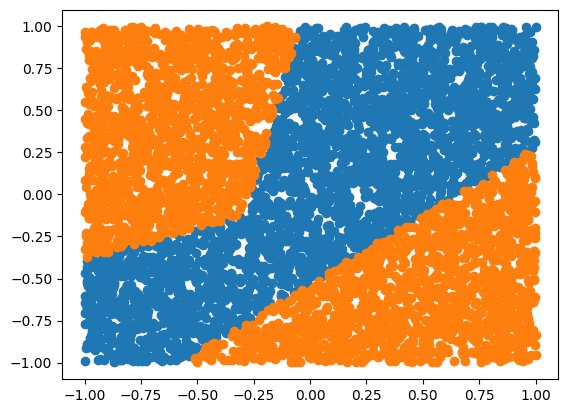

Current height: 6
starting score 1.0
Train acc 1.0
Valid acc 0.978
Test acc 0.9773333333333334
Best height: 6
Train acc 1.0
Test acc 0.9773333333333334
-0.367077031875648 -0.5498040168502515 0.037909326119801724
-0.37008583910601833 -0.15036043909073454 -0.2236058507305139


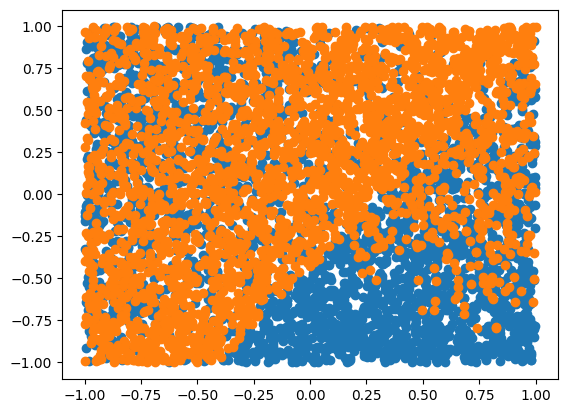

Current height: 6
starting score 1.0
Train acc 0.9823333333333333
Valid acc 0.9206666666666666
Test acc 0.9233333333333333
Best height: 6
Train acc 0.9823333333333333
Test acc 0.9233333333333333
0.022995559582343294 0.5876400071779604 -0.456364147551192
0.02749846060797697 0.6023333637076035 -0.8286728641732573


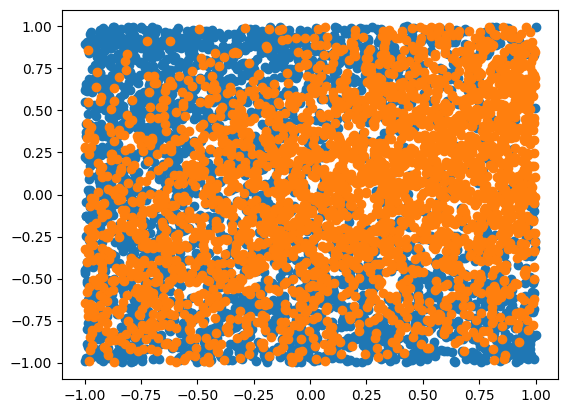

Current height: 6
starting score 1.0
Train acc 0.98
Valid acc 0.902
Test acc 0.8833333333333333
Best height: 6
Train acc 0.98
Test acc 0.8833333333333333
0.9064702682237289 0.21336045773904733 -0.7587261655791501
0.9078929589531859 0.47331165624369853 -0.3465349667899367


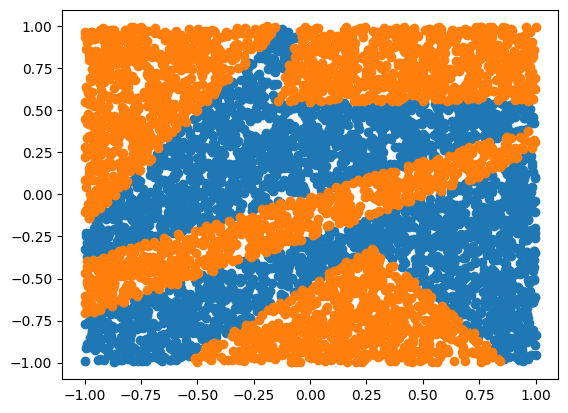

Current height: 6
starting score 1.0
Train acc 0.975
Valid acc 0.9346666666666666
Test acc 0.938
Best height: 6
Train acc 0.975
Test acc 0.938
-0.12838865653337514 -0.5666186597597529 0.5129434452267303
-0.1319180093427199 -0.1680225384916203 0.2517707555677684


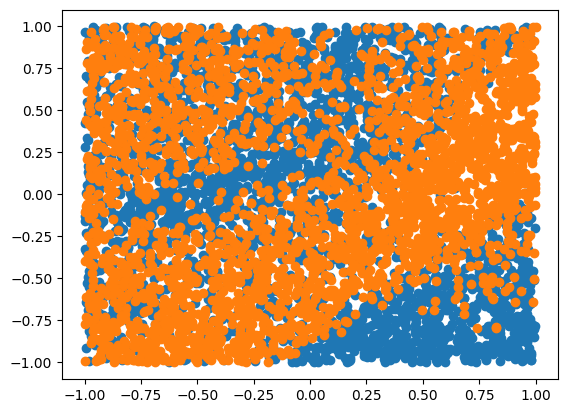

Current height: 6
starting score 1.0
Train acc 0.9536666666666667
Valid acc 0.8846666666666667
Test acc 0.886
Best height: 6
Train acc 0.9536666666666667
Test acc 0.886
0.8158949242739244 0.209356953147428 0.10562967410465221
0.8202173249848289 0.22405030967707107 -0.26714990784834935


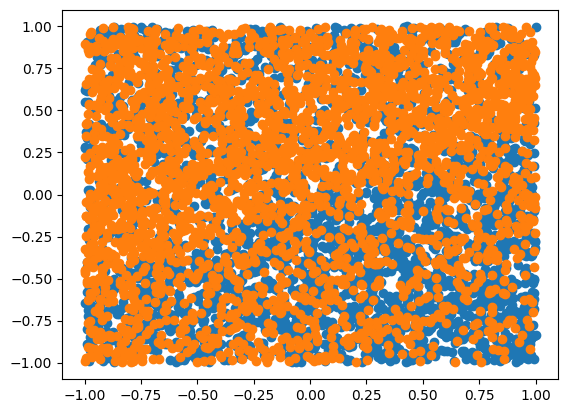

Current height: 6
starting score 1.0


KeyboardInterrupt: 

In [7]:
for height in [2 ,3, 4]:
    for input_dim in [2, 3, 4]:
        for num_data in [6000]:
            for algo in algorithms:
                # num_data = 12000
                seed_set = 0
                seeds = [1234]
                for seed in seeds:
                    ((data_x, labels), (w_list, b_list, vals), stats) = data_gen_decision_tree(
                                                                dim=input_dim, seed=seed, num_levels=height,
                                                                num_data=num_data)
                    seed_set=seed
                if args.input_dim == 2:
                    visualize(data_x, labels)

                w_list_old = np.array(w_list)
                b_list_old = np.array(b_list)

                num_data = len(data_x)
                num_train= num_data//2
                num_vali = num_data//4
                num_test = num_data//4
                train_data = data_x[:num_train,:]
                train_data_labels = labels[:num_train]

                vali_data = data_x[num_train:num_train+num_vali,:]
                vali_data_labels = labels[num_train:num_train+num_vali]

                test_data = data_x[num_train+num_vali :,:]
                test_data_labels = labels[num_train+num_vali :] 
                model = algo(args)

                model.train(train_data, train_data_labels, vali_data, vali_data_labels, test_data, test_data_labels, w_list_old=w_list_old, b_list_old=b_list_old)

In [5]:
import matplotlib.pyplot as plt
def visualize(data_x, labels):
    class_0 = data_x[labels == 0]
    class_1 = data_x[labels == 1]

    plt.scatter(class_0[:, 0], class_0[:, 1])
    plt.scatter(class_1[:, 0], class_1[:, 1])
    plt.show()

In [6]:
((data_x, labels), (w_list, b_list, vals), stats) = data_gen_decision_tree(
                                                                dim=2, seed=982, num_levels=5,
                                                                num_data=100000)


0.8498612343842309 0.8528247223340256 0.8799832120161181
0.8512684506172683 1.2962466740479213 0.4594814247530699


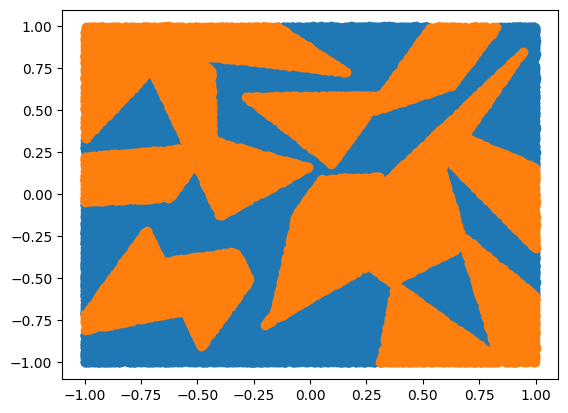

In [7]:
visualize(data_x, labels)

In [4]:
from HHCART import HouseHolderCART
from segmentor import MSE, MeanSegmentor
from arguments import check_fit_arguments


In [9]:
model = HouseHolderCART(MSE(), MeanSegmentor(), max_depth=5)

In [10]:
((data_x, labels), (w_list, b_list, vals), stats) = data_gen_decision_tree(
                                                                dim=2, seed=982, num_levels=4,
                                                                num_data=2000) 

0.9419476495207254 0.9377801572002574 0.21904476276569762
0.9245878729000244 1.3951775205419015 -0.1729710303035254


In [11]:
model.fit(data_x, labels)

In [13]:
model.predict(data_x)

array([0.98, 0.97, 0.28, ..., 0.55, 0.06, 0.08])